## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Validate that the data is clean in both files
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [2]:
# Check the number of rows in mouse_metadata
metadata_count = len(mouse_metadata)
metadata_count

249

In [3]:
# Check the number of unique mice in mouse_metadata
mouse_meta_count = mouse_metadata["Mouse ID"].nunique()
mouse_meta_count

249

In [4]:
# Check the number of mice in mouse_metadata using groupby
mouse_group = mouse_metadata.groupby(["Mouse ID","Drug Regimen","Sex","Age_months","Weight (g)"])
mouse_group_count = len(mouse_group)
mouse_group_count

249

In [5]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [6]:
# Check the number of rows in study_results
results_count = len(study_results) 
results_count

1893

In [7]:
# Check the number of unique mice and timepoint in the study_results using groupby
results_group = study_results.groupby(["Mouse ID","Timepoint"])
results_group_count = len(results_group)
results_group_count

1888

In [8]:
# Combine the data into a single dataset
mouse_study = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [9]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
dfObj = pd.DataFrame(mouse_study, columns=["Mouse ID","Timepoint"])

# Get all the data for the duplicate mouse data in study
duplicateRow = mouse_study[dfObj.duplicated()]
duplicateRow

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse data by its ID
mouse_study.drop_duplicates(subset=["Mouse ID","Timepoint"])

mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [11]:
# Check the number of mice in the clean DataFrame
clean_count = len(mouse_study) 
clean_count

1893

## Summary Statistics

In [12]:
# Calculate Summary Statistics using a single groupby function
mouse_study.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean', 'median', 'var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [13]:
# Calculate Summary Statistics by creating multiple series and putting them all together at the end
drug_group = mouse_study.groupby(["Drug Regimen"])
vt_mean = drug_group["Tumor Volume (mm3)"].mean()
vt_median = drug_group["Tumor Volume (mm3)"].median()
vt_variance = drug_group["Tumor Volume (mm3)"].var()
vt_std_dev = drug_group["Tumor Volume (mm3)"].std()
vt_SEM = drug_group["Tumor Volume (mm3)"].sem()

# Summary Statistics dataframe
summary_statistics = pd.DataFrame({
    "Mean": vt_mean,
    "Median": vt_median,
    "Variance": vt_variance,
    "Standard Deviation": vt_std_dev,    
    "SEM": vt_SEM    
})
summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [14]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 
# To plot a chart using pandas, collect the data and create a DataFrame that will be used to plot the chart
drug_group = mouse_study.groupby(["Drug Regimen"])
mice = drug_group["Mouse ID"].count()
drug_summary = pd.DataFrame({"Mice": mice})
drug_summary

,Mice
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


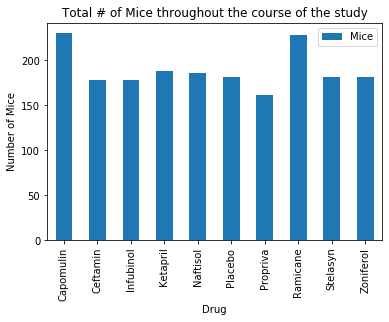

<Figure size 432x288 with 0 Axes>

In [15]:
# Use DataFrame.plot() in order to create a bar chart of the data
drug_summary.plot(kind="bar", title="Total # of Mice throughout the course of the study")

plt.xlabel("Drug")
plt.ylabel("Number of Mice")

plt.show()
plt.tight_layout()

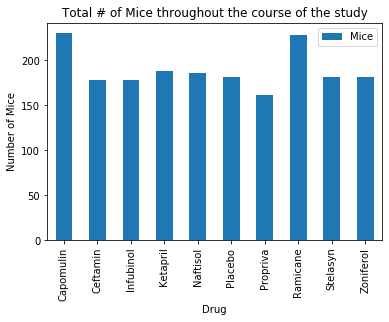

<Figure size 432x288 with 0 Axes>

In [16]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.
drug_summary.plot.bar()

plt.title("Total # of Mice throughout the course of the study")
plt.xlabel("Drug")
plt.ylabel("Number of Mice")

plt.show()
plt.tight_layout()

In [17]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice
gender_group = mouse_study.groupby(["Sex"])
mice = gender_group["Mouse ID"].count()
gender_summary = pd.DataFrame({"Mice": mice})
gender_summary

,Mice
Sex,
Female,935
Male,958


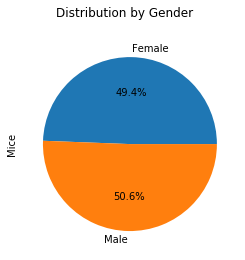

<Figure size 432x288 with 0 Axes>

In [19]:
# Use DataFrame.plot() in order to create a pie chart of the data
gender_summary.plot(kind="pie", subplots=True, title="Distribution by Gender",legend=False,autopct='%1.1f%%')

plt.show()
plt.tight_layout()

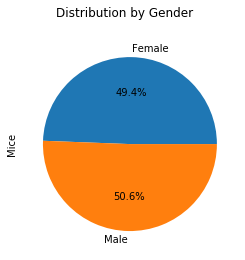

<Figure size 432x288 with 0 Axes>

In [20]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice
gender_summary.plot.pie(subplots=True, title="Distribution by Gender", legend=False,autopct='%1.1f%%')

plt.show()
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (latest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
